In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [112]:
file_path = "/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt"
with open(file_path, 'r') as file:
    data_description = file.readlines()
for line in data_description:
    print(line)


MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Number of lines: 523
Number of words: 1680


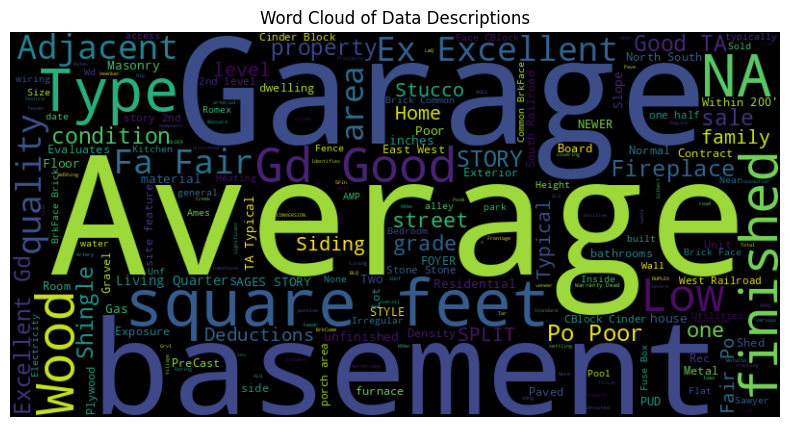

In [113]:
# Count lines
num_lines = len(data_description)
print(f"Number of lines: {num_lines}")

# Count words
total_words = sum(len(line.split()) for line in data_description)
print(f"Number of words: {total_words}")

# Create a word cloud (requires the WordCloud library)
from wordcloud import WordCloud

text = ''.join(data_description)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Data Descriptions")
plt.show()


In [114]:
df_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [115]:
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [116]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [120]:
df_train.shape

(1460, 81)

In [121]:
df_test.shape

(1459, 80)

In [122]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [123]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [124]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(),inplace=True)
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace=True)


In [125]:
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0],inplace=True)
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0],inplace=True)

In [126]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [127]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [128]:
#checking duplicates value
df_train.duplicated().sum()
df_test.duplicated().sum()

0

In [129]:
df_train.drop(['Id', 'Alley', 'MiscFeature', 'PoolQC', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)
df_test.drop(['Id', 'Alley', 'MiscFeature', 'PoolQC', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [131]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [132]:
numerical_columns = df_train.columns[df_train.dtypes != 'object']
categorical_columns = df_train.columns[df_train.dtypes == 'object']
print("Categorical feature are : ",categorical_columns)
print("numerical_feature are :",numerical_columns)

Categorical feature are :  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
numerical_feature are : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'F

In [133]:
# List of categorical column names
categorical_columns = ['MSZoning', 'Street','LotShape', 'LandContour', 'Utilities',
   'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
   'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
   'Exterior2nd','ExterQual', 'ExterCond', 'Foundation',
   'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
   'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
   'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
   'GarageCond', 'PavedDrive',
   'SaleType', 'SaleCondition']

# Loop through the list of categorical columns and count unique values
for column_name in categorical_columns:
    unique_counts = df_train[column_name].value_counts()
    print(f"Column: {column_name}")
    print(unique_counts)
    print()


Column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Column: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Column: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

Column: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Column: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

Column: LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Column: LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Column: Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Cle

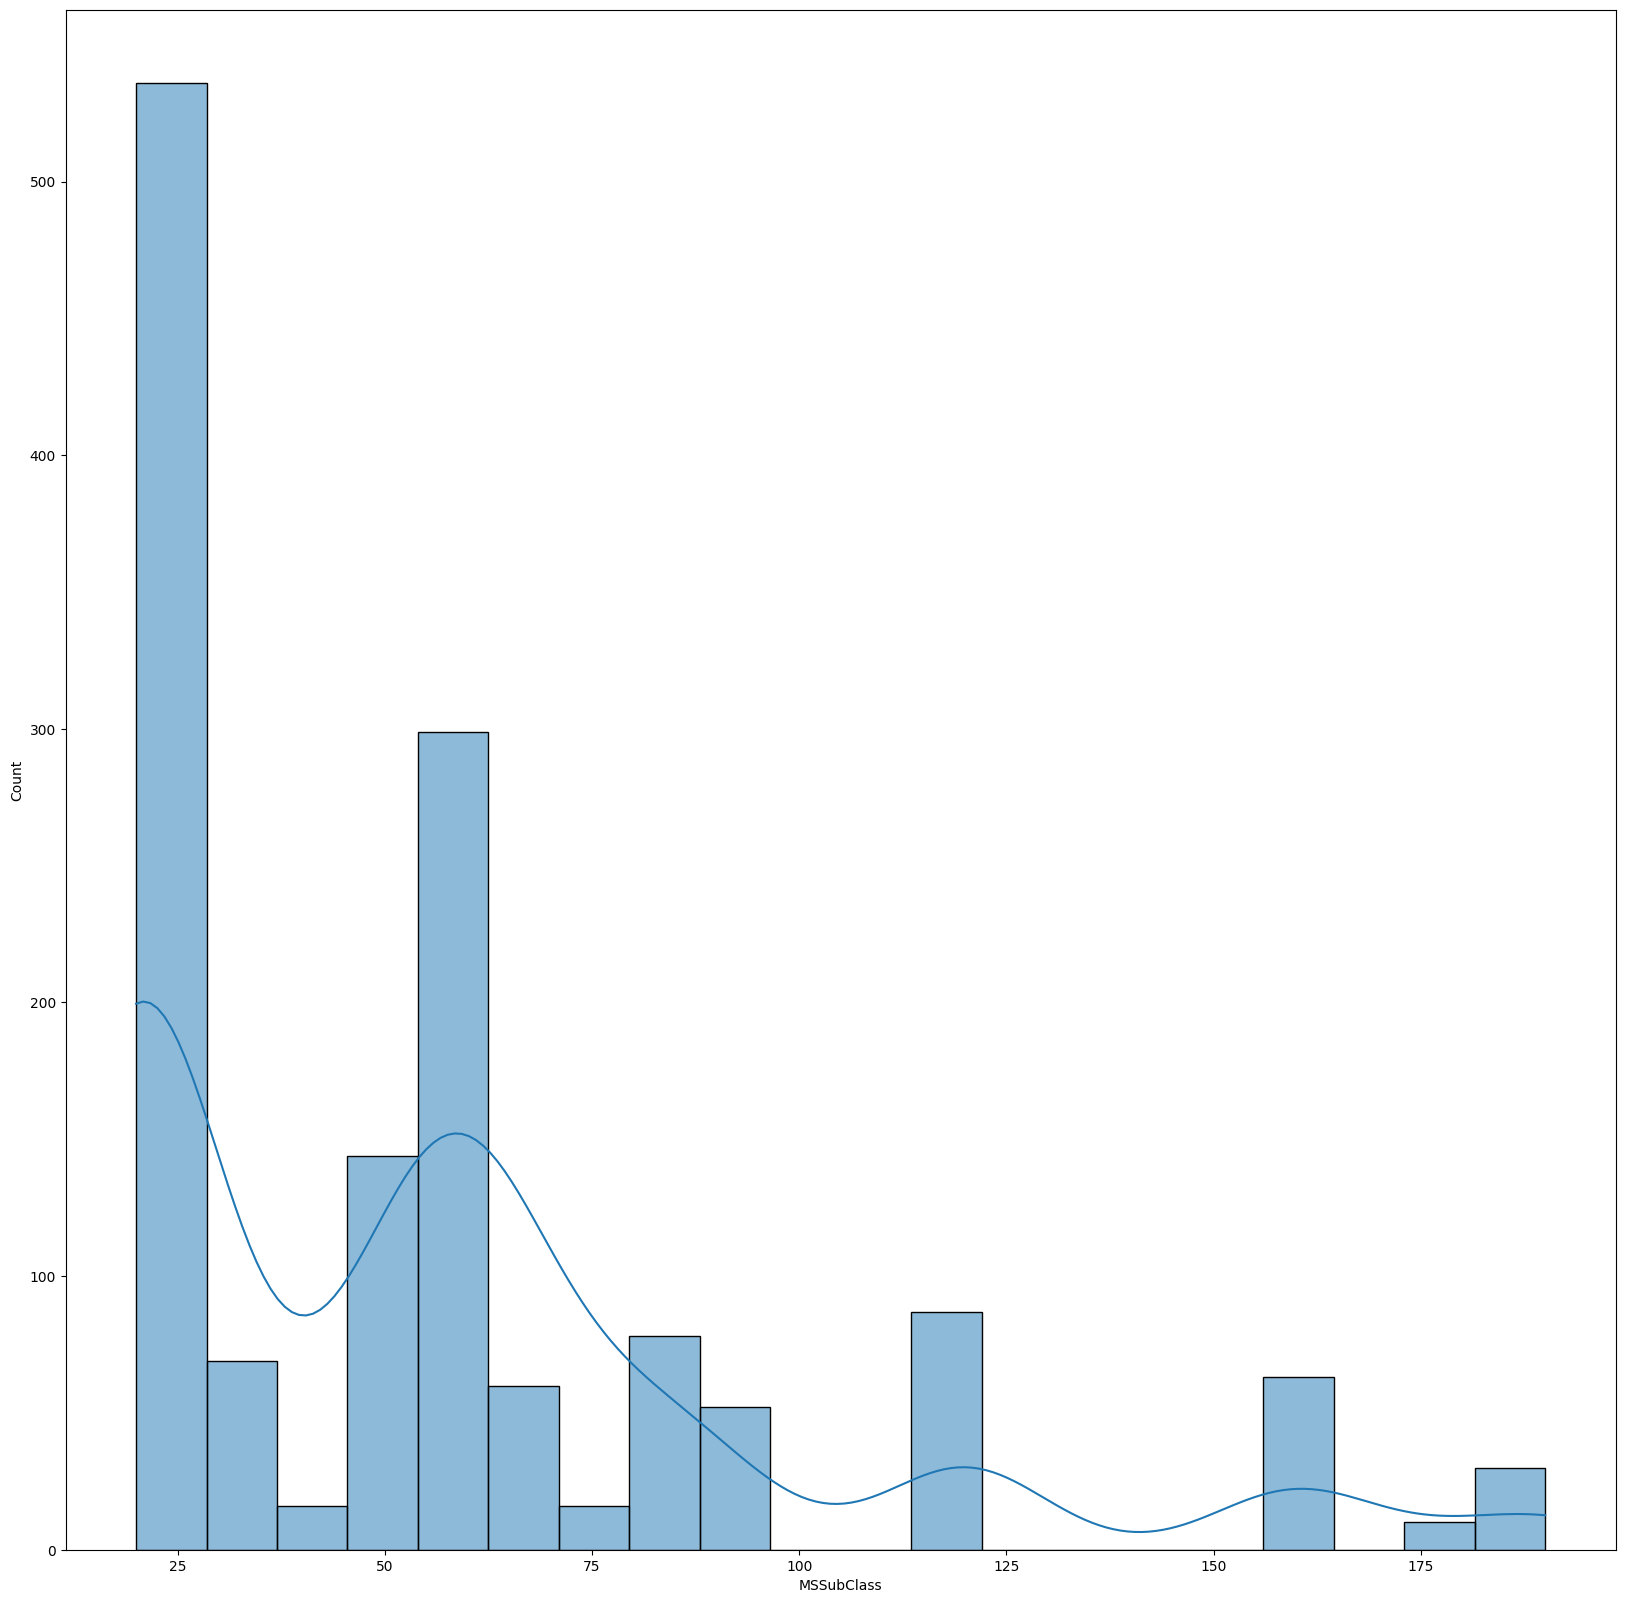

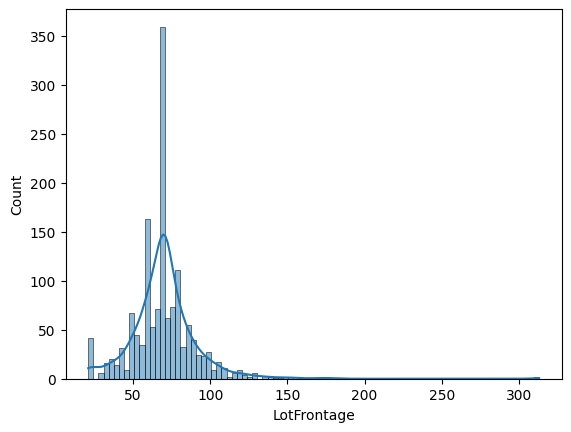

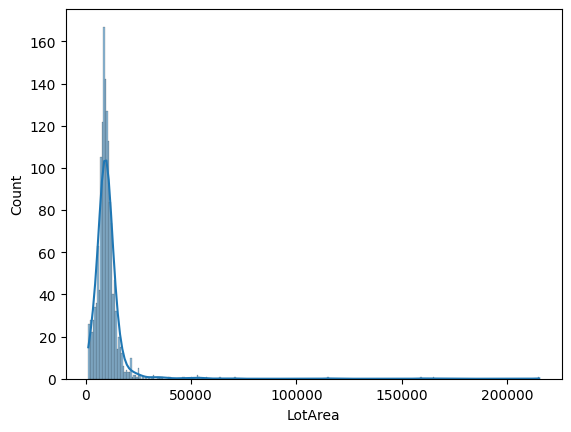

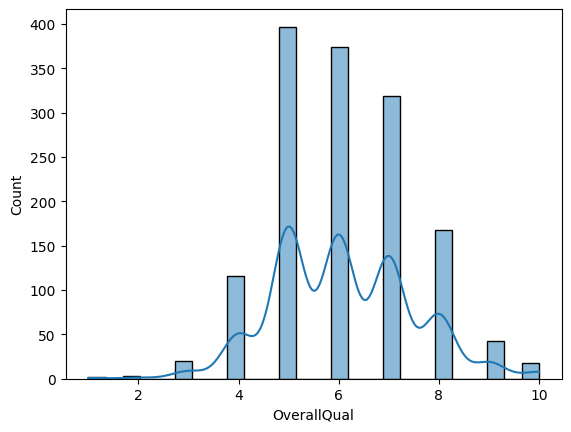

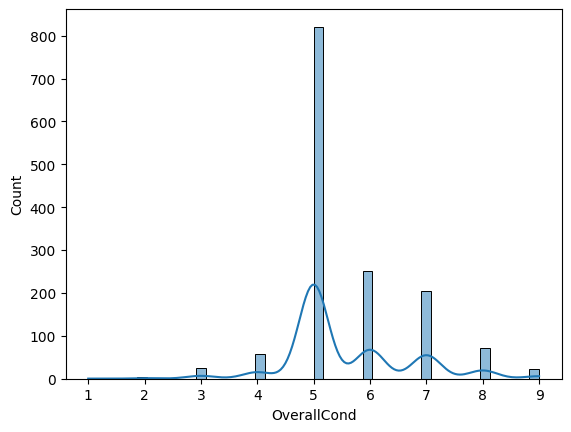

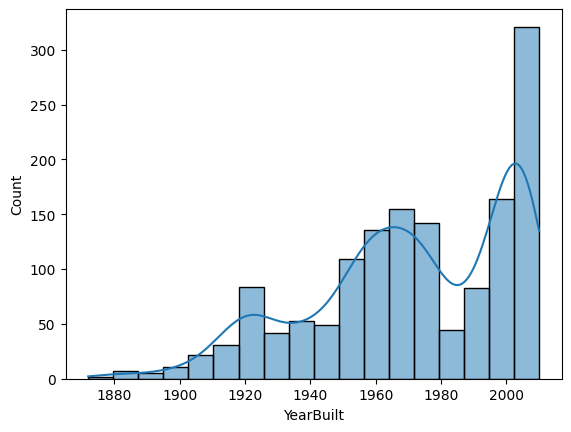

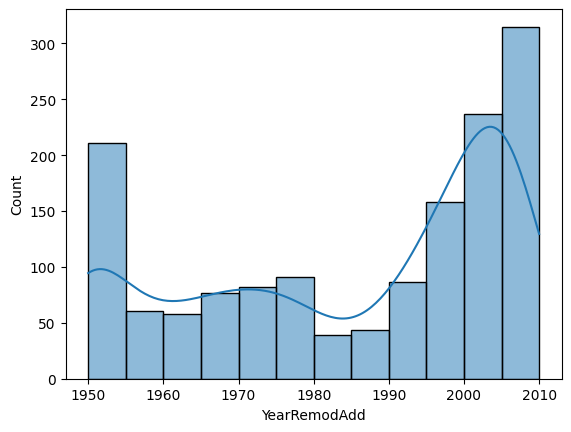

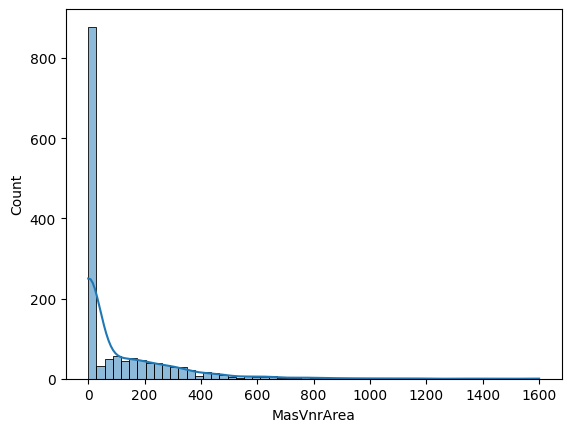

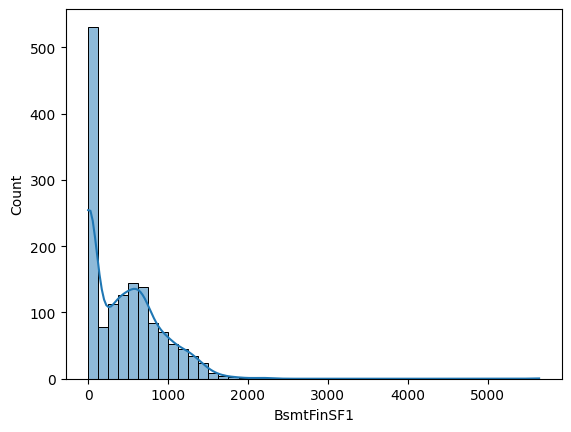

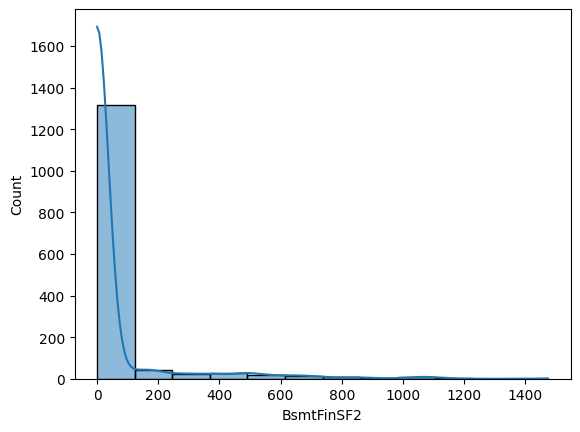

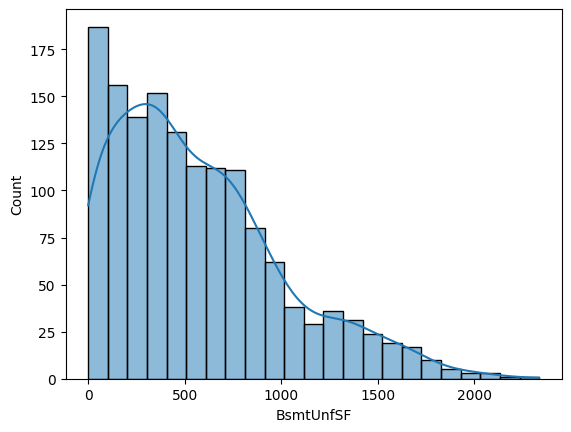

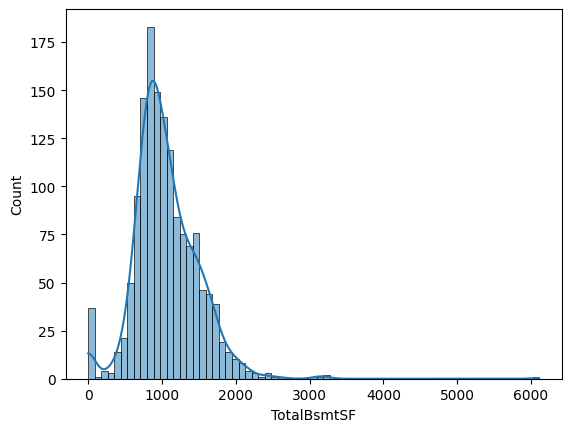

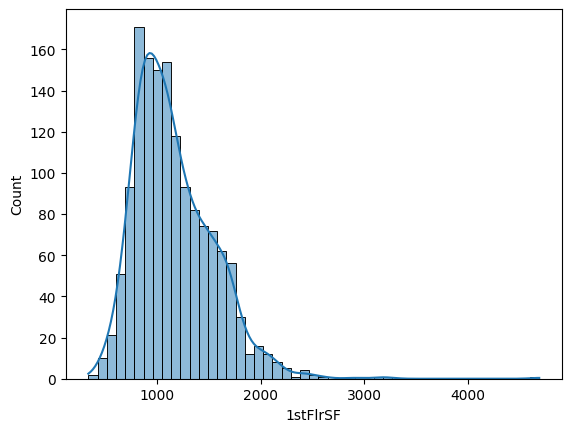

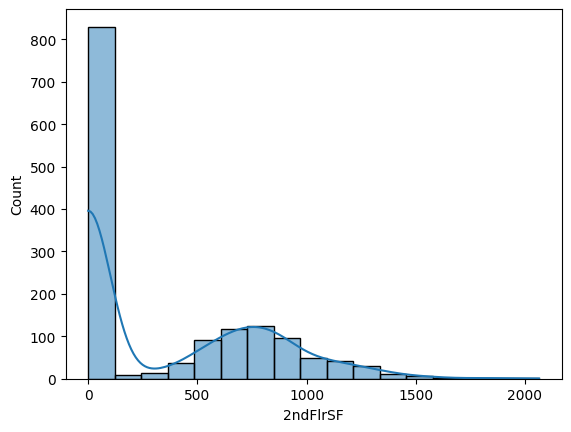

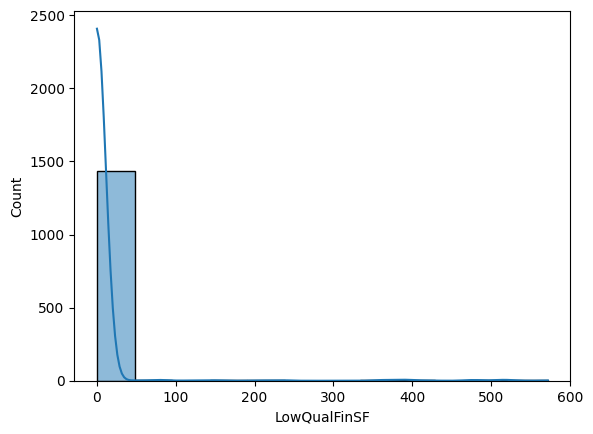

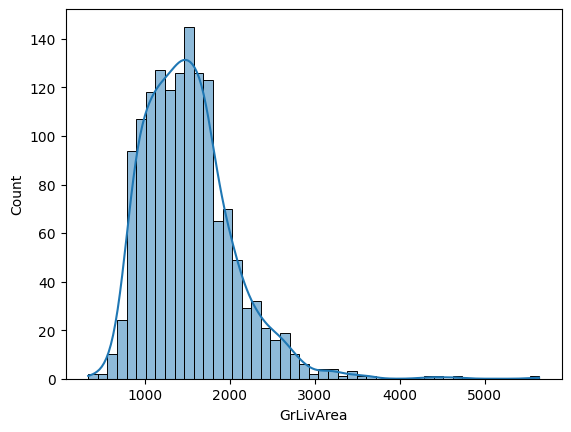

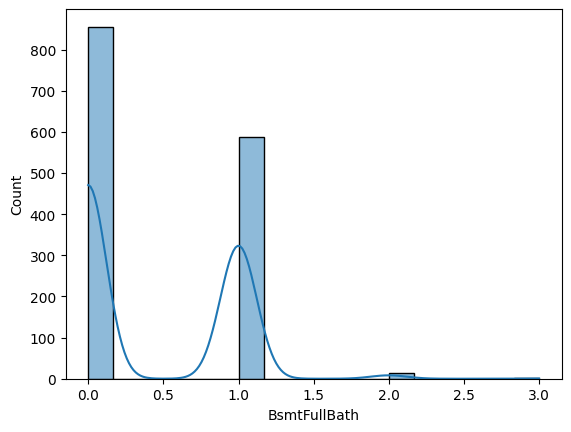

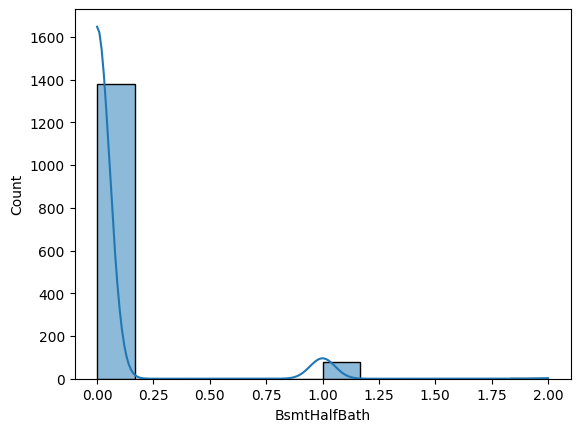

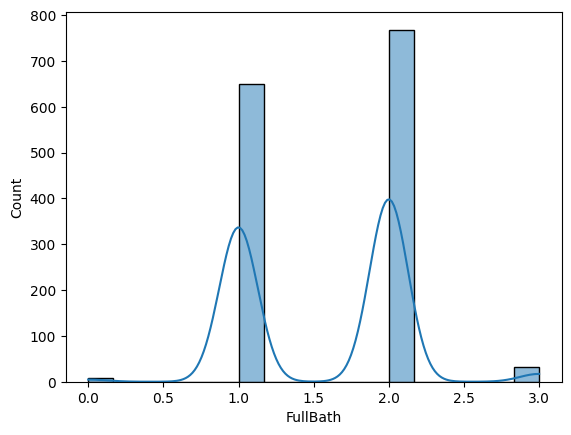

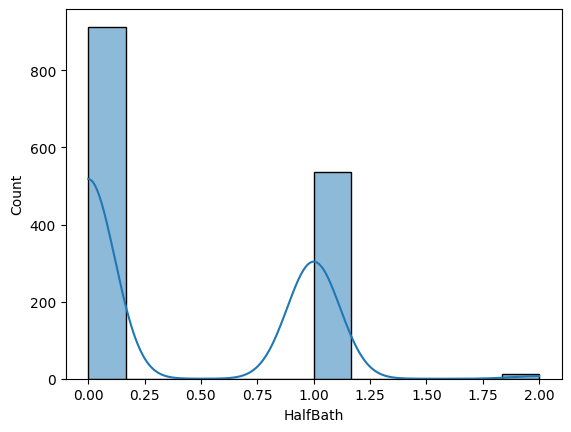

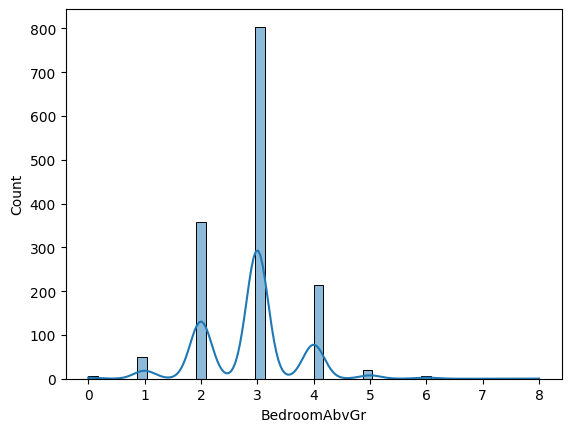

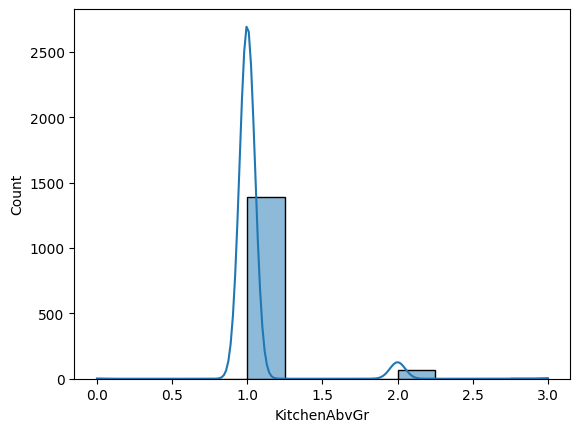

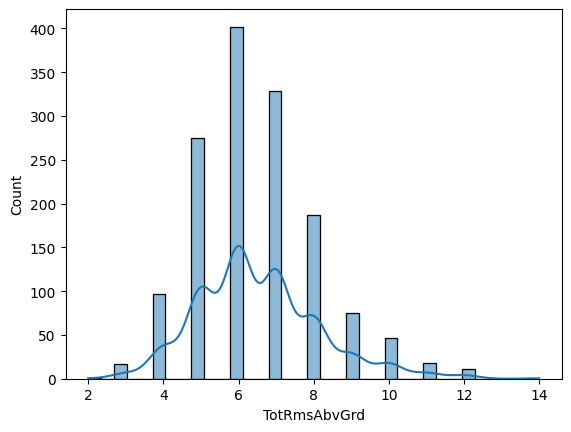

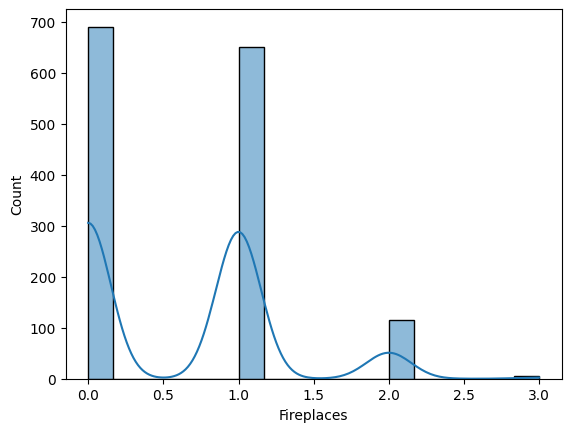

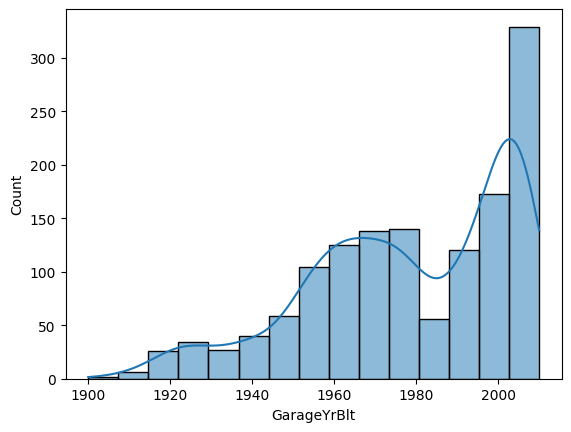

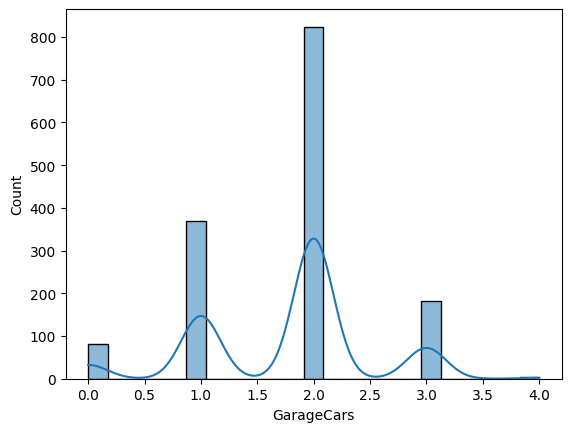

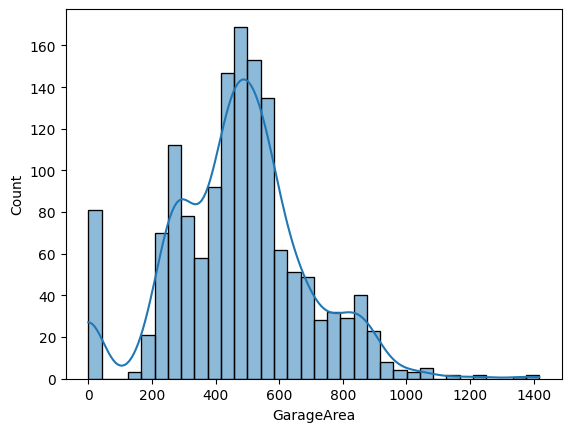

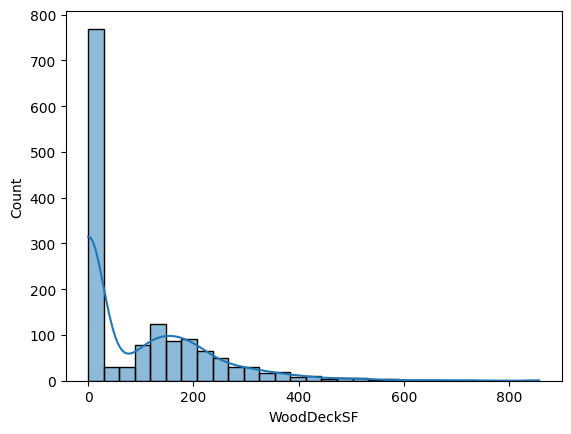

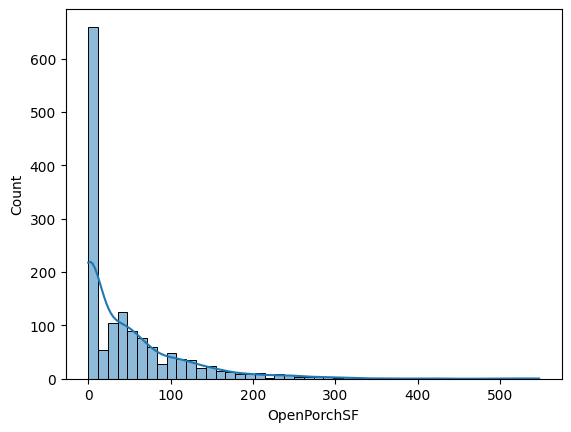

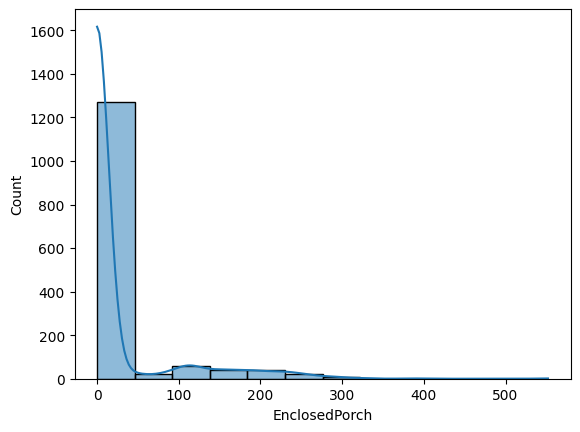

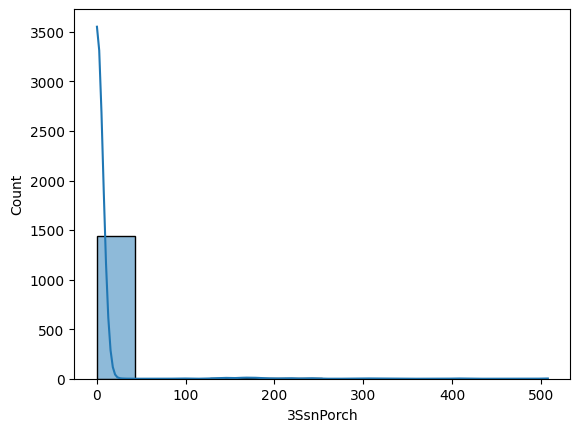

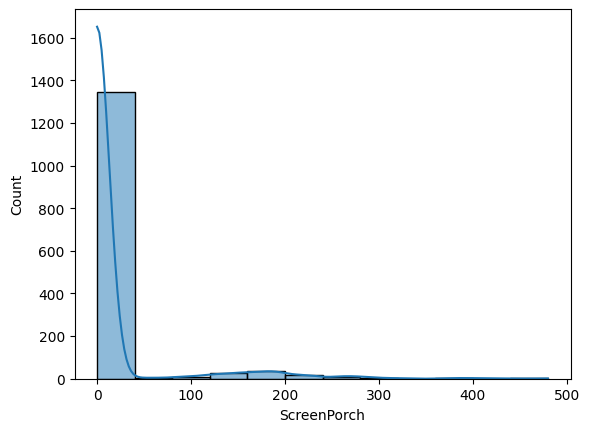

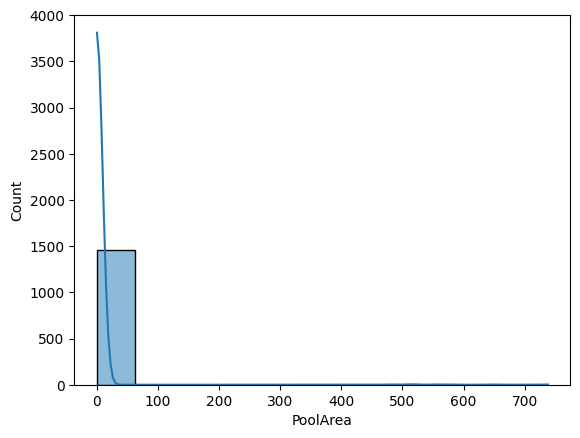

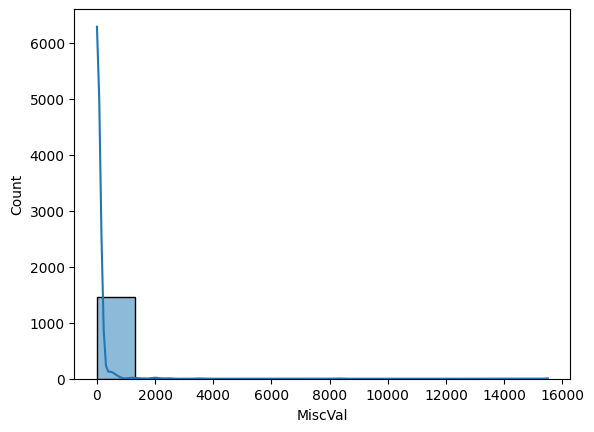

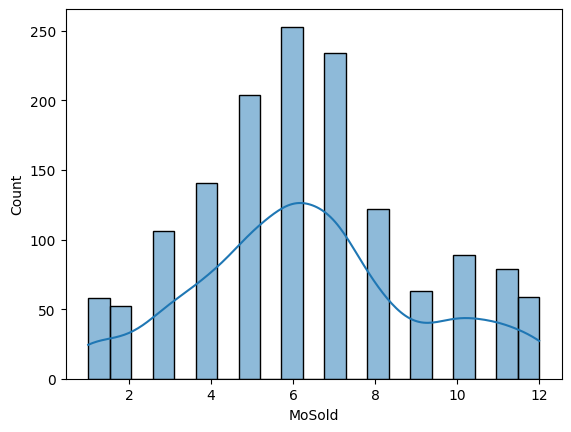

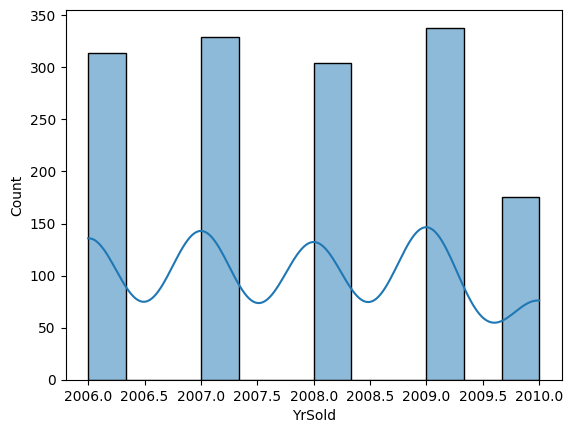

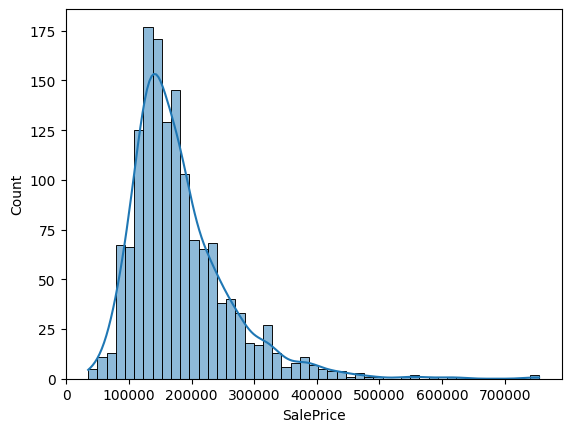

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
x=1
for i in numerical_columns:
    sns.histplot(data=df_train,x=i,kde=True)
    print('\n')
    plt.show()

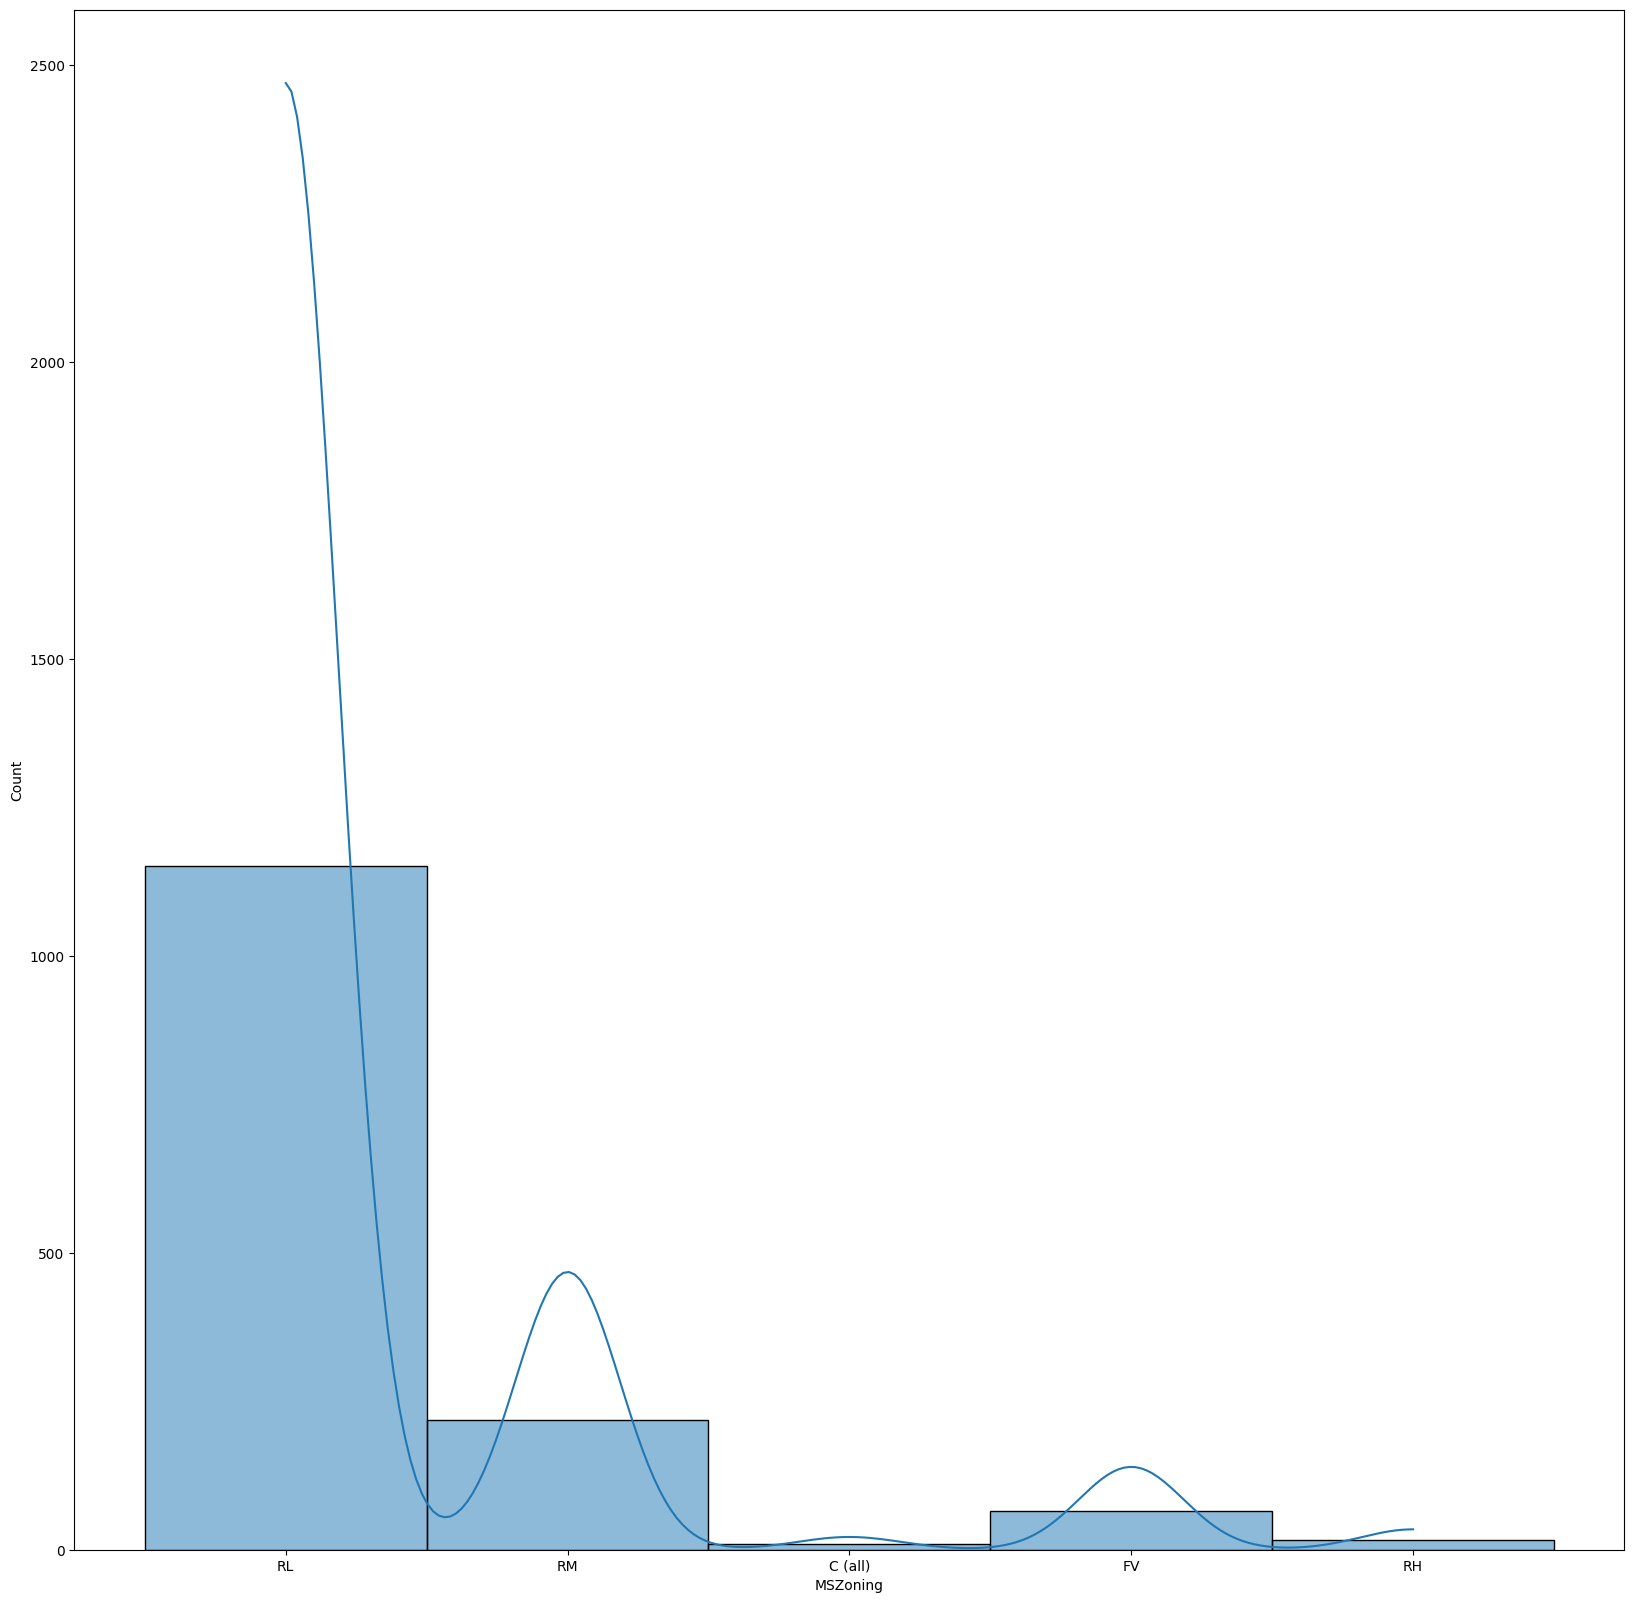

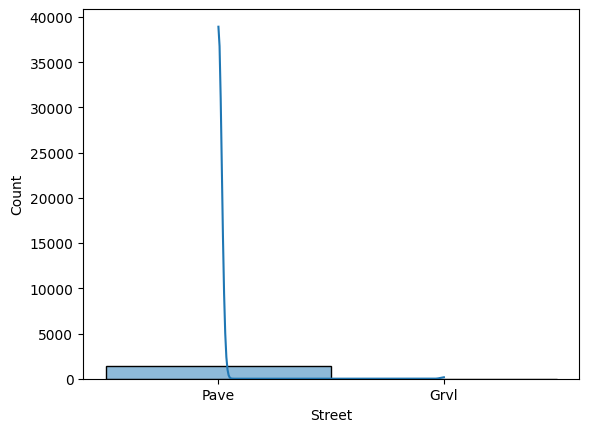

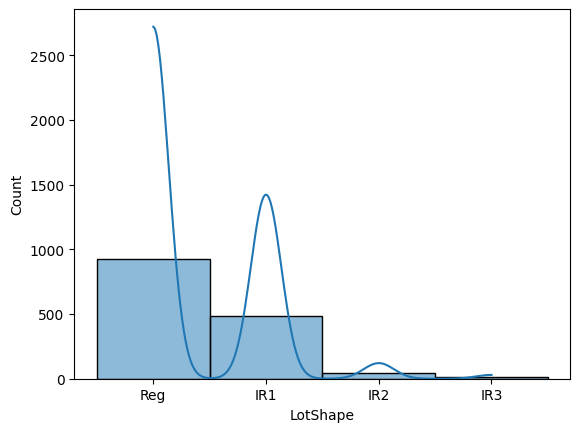

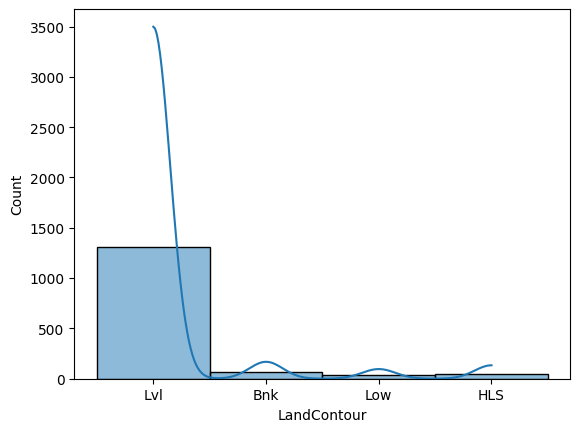

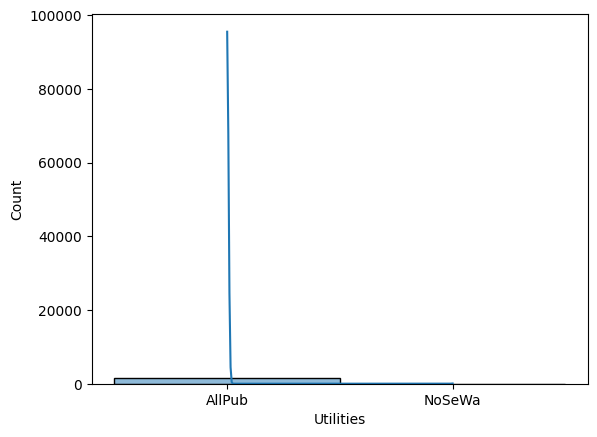

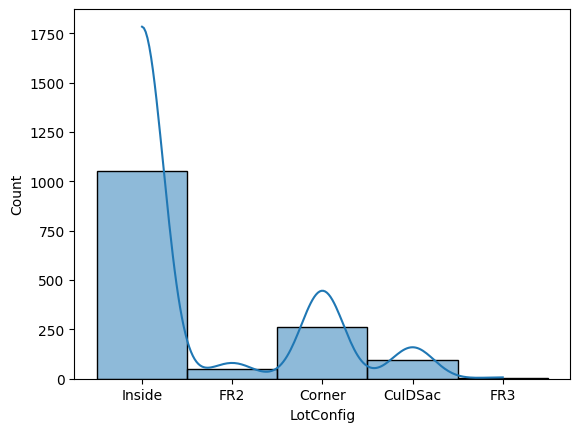

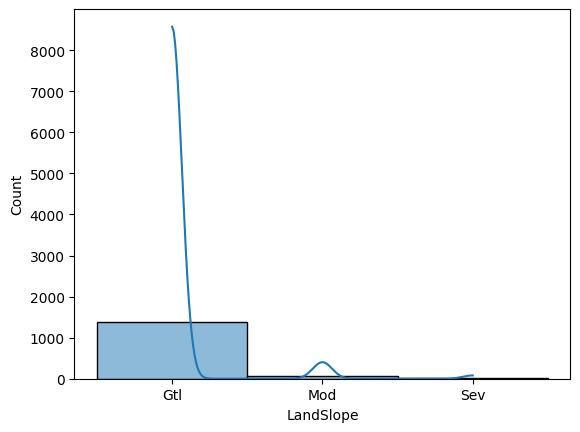

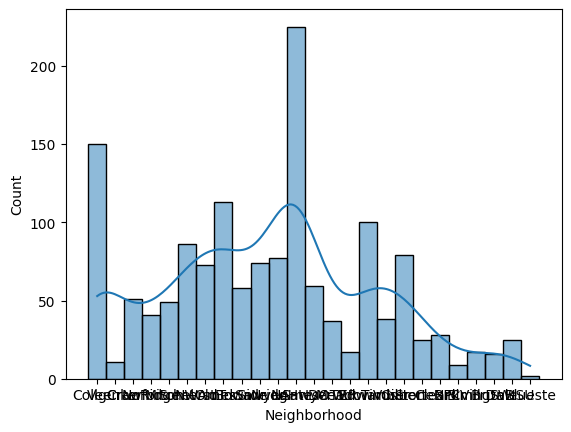

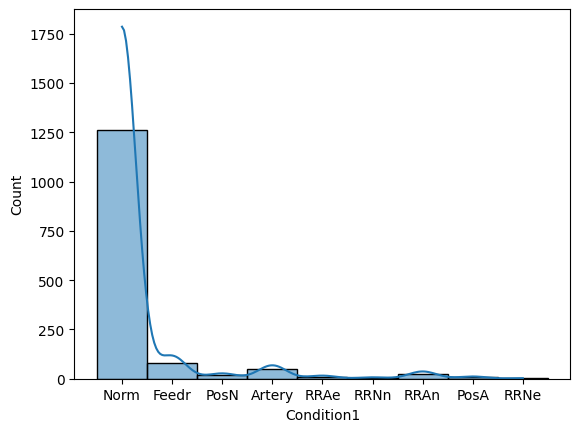

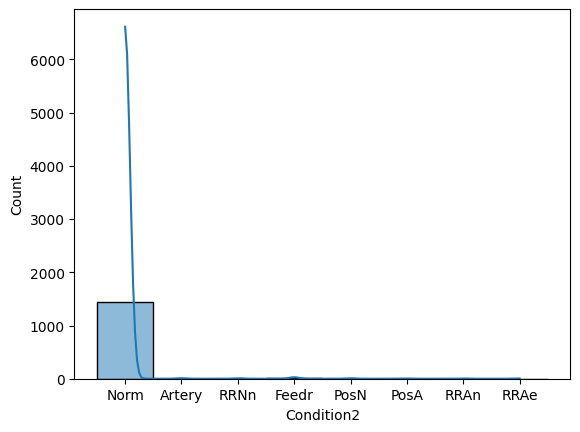

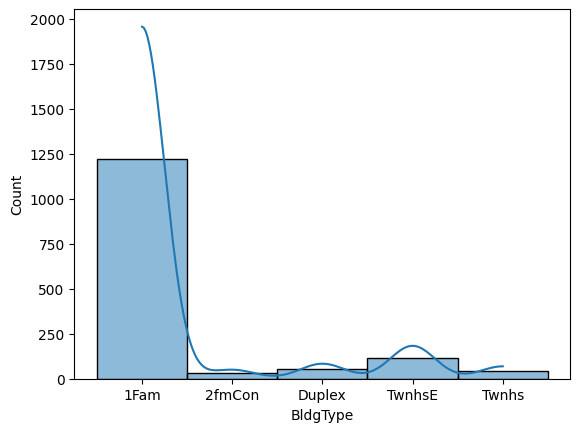

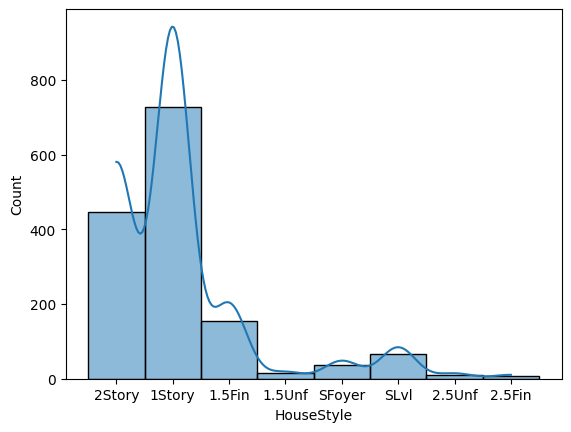

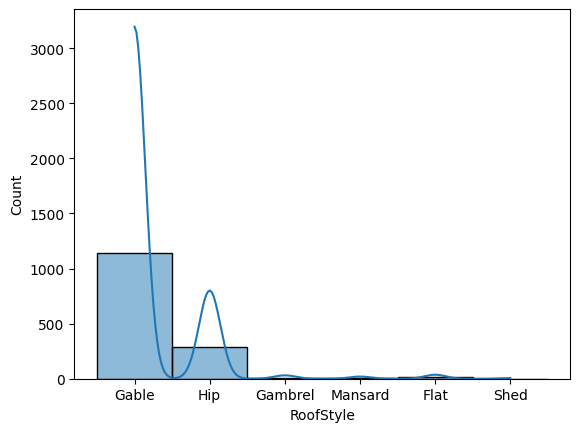

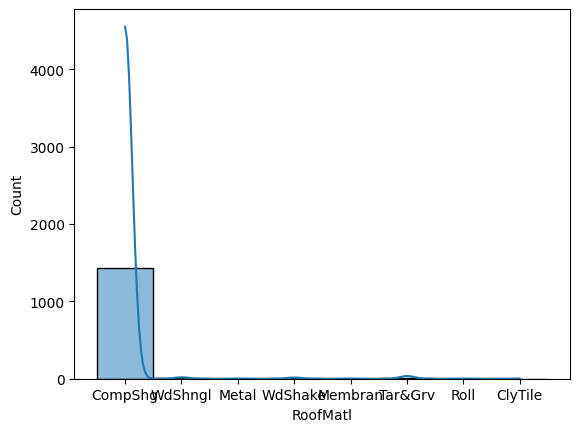

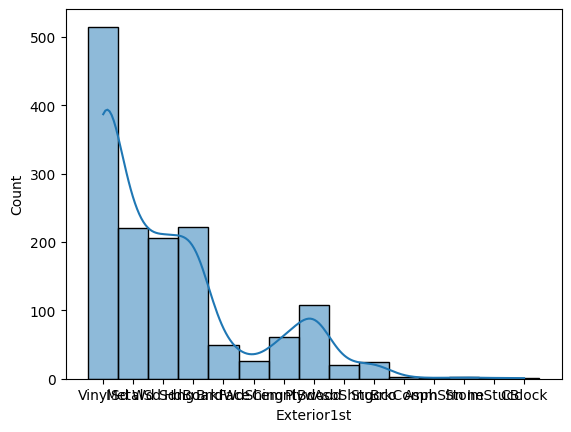

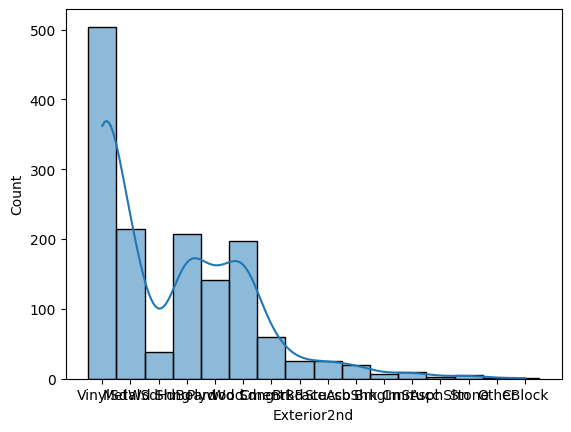

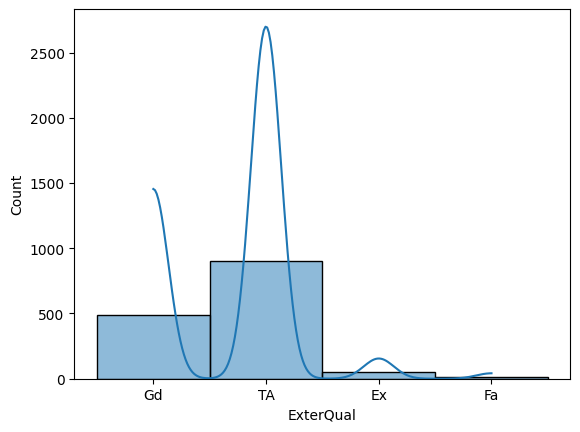

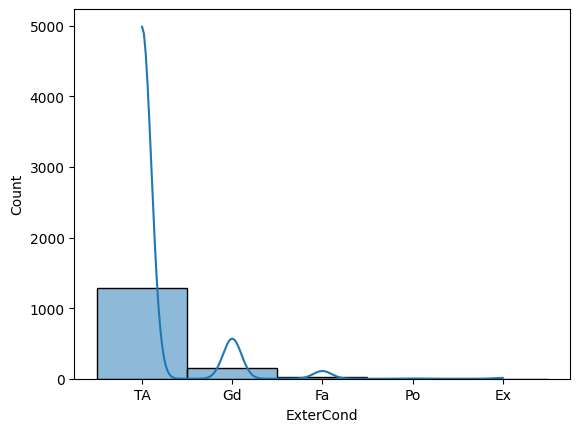

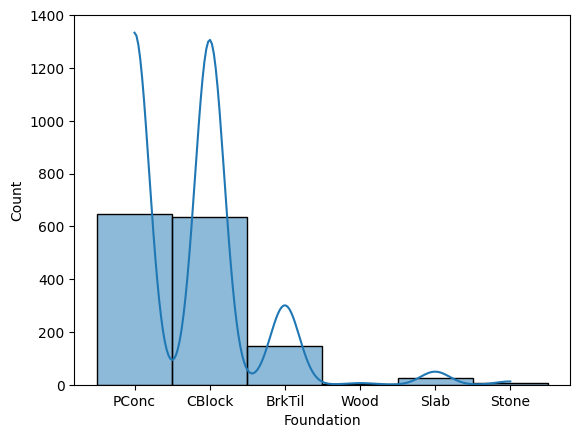

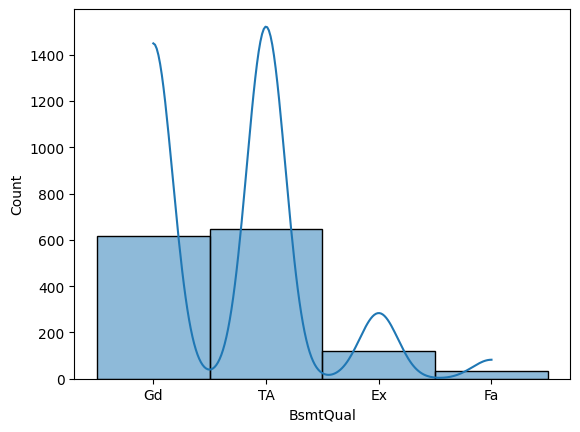

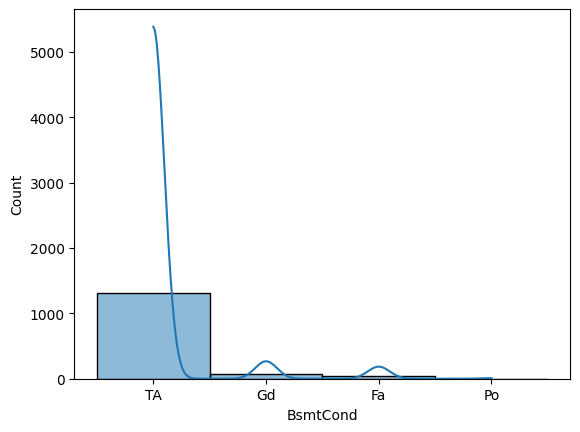

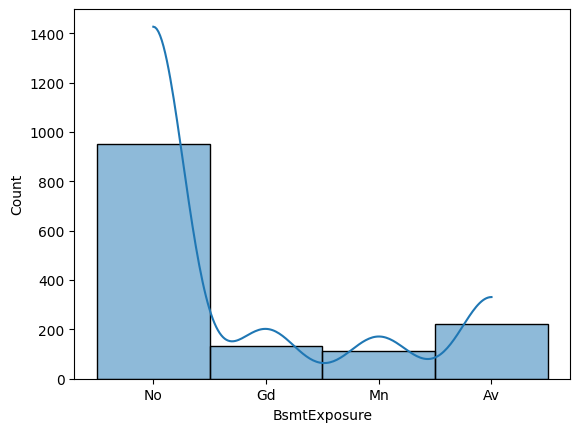

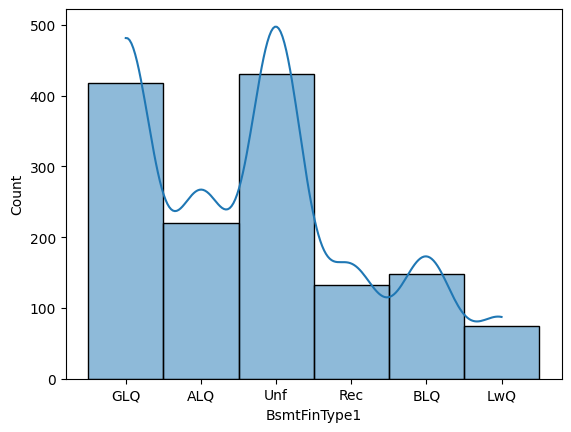

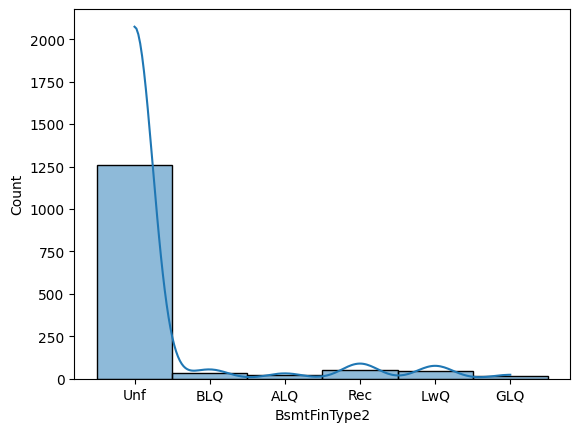

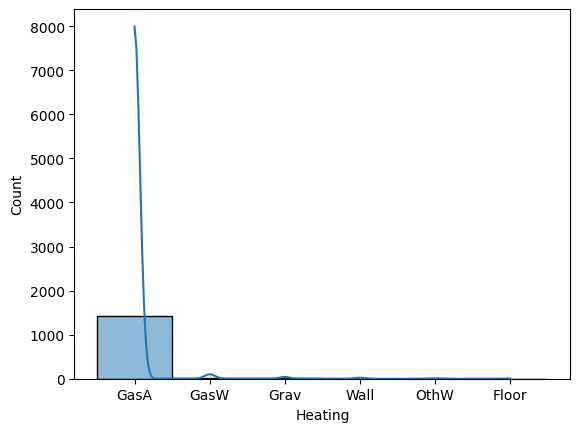

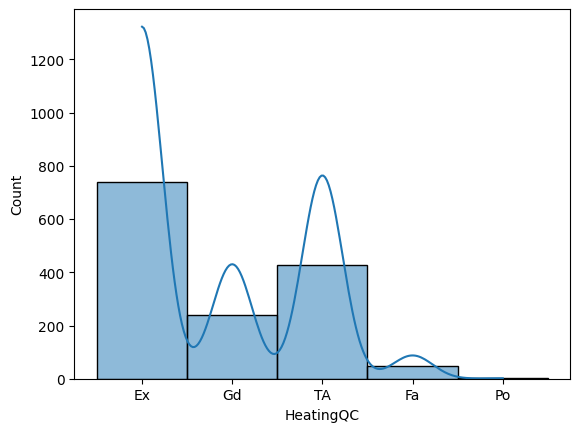

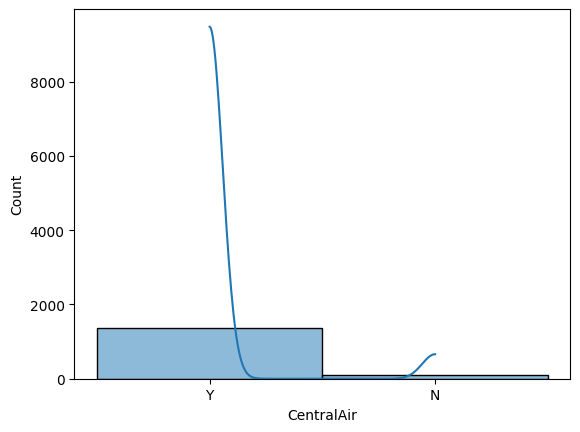

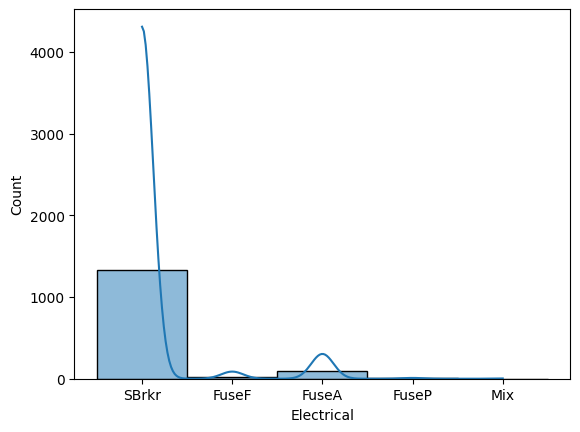

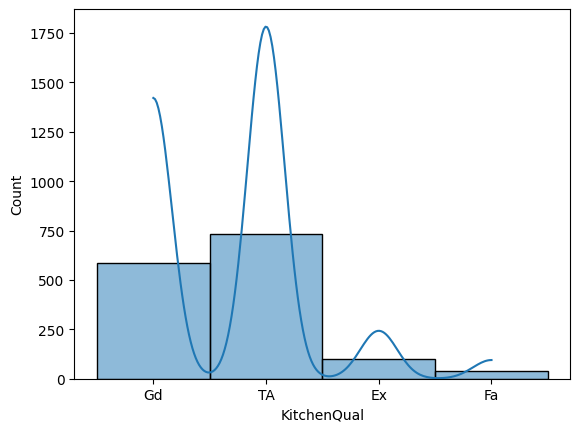

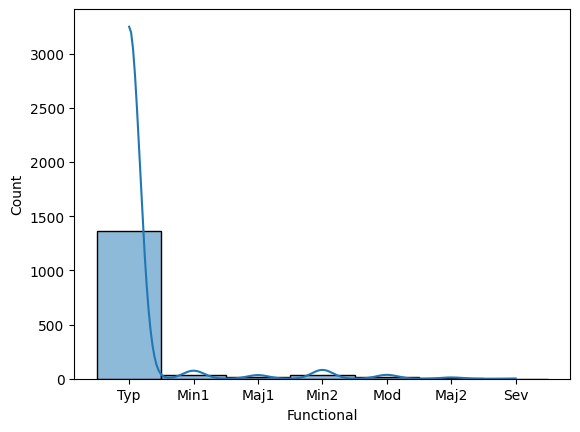

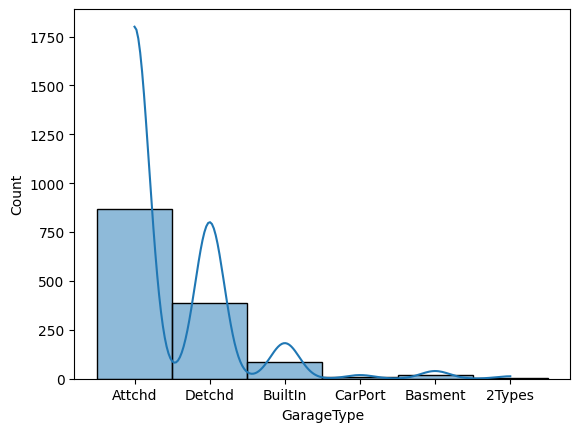

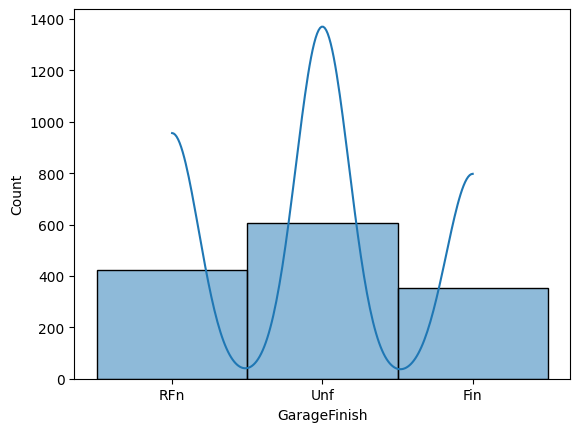

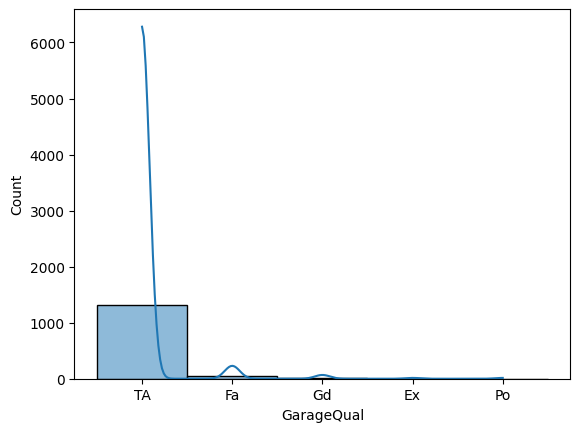

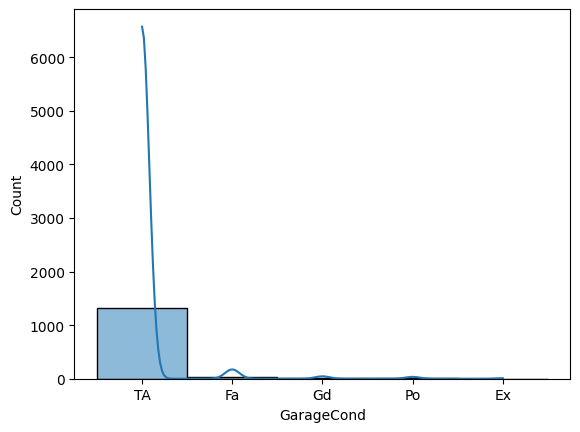

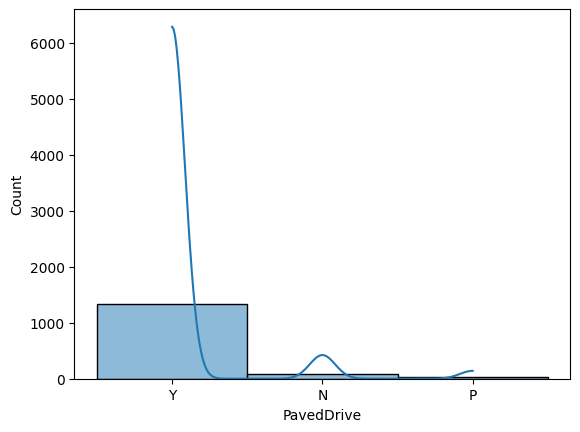

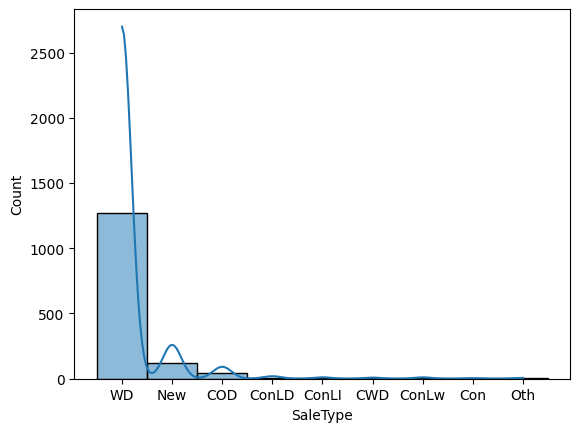

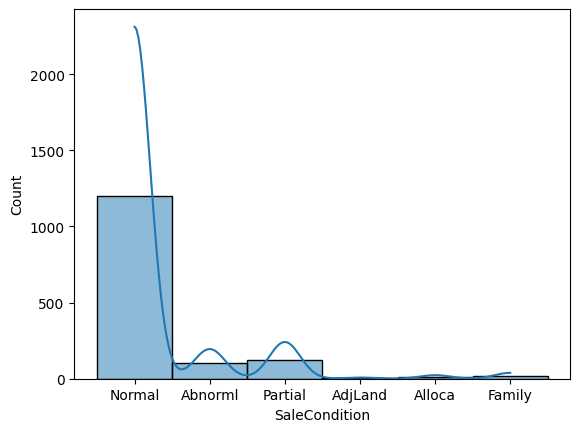

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
x=1
for i in categorical_columns:
    sns.histplot(data=df_train,x=i,kde=True)
    print('\n')
    plt.show()

**Model Training**

In [136]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [137]:
df_train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [138]:
df_train['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [139]:
df_train['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [140]:
df_train['3SsnPorch'].value_counts()

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

In [141]:
df_train['EnclosedPorch'].value_counts()

EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64

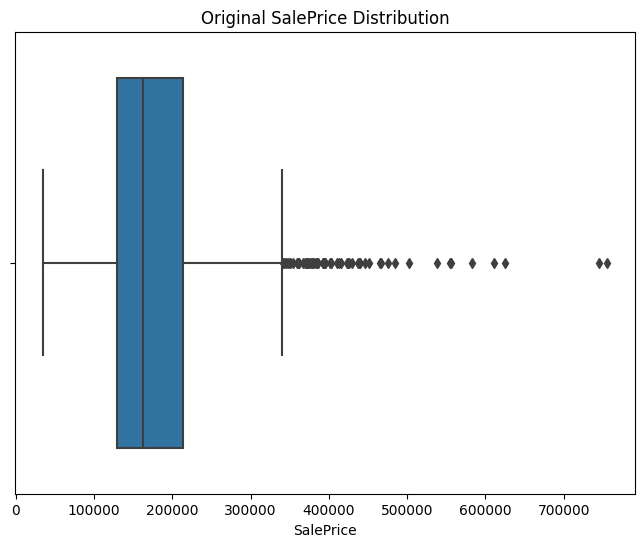

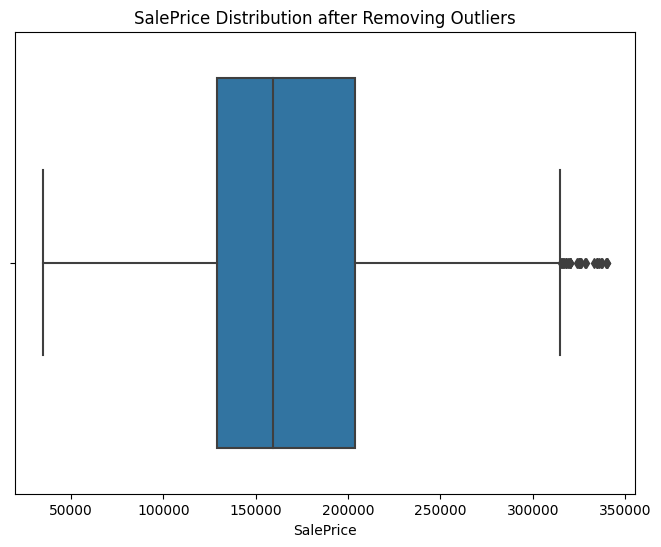

Summary Statistics of SalePrice after Removing Outliers:
count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64


In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Step 1: Visualize the original distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Original SalePrice Distribution')
plt.show()

# Step 2: Identify and Remove Outliers
# Define a threshold for outliers (e.g., 1.5 times the interquartile range)
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Filter the dataset to remove outliers
df_train_filtered = df_train[(df_train['SalePrice'] >= Q1 - threshold) & (df_train['SalePrice'] <= Q3 + threshold)]

# Step 3: Visualize the filtered distribution without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train_filtered['SalePrice'])
plt.title('SalePrice Distribution after Removing Outliers')
plt.show()

# Step 4: Check the summary statistics of SalePrice after removing outliers
print("Summary Statistics of SalePrice after Removing Outliers:")
print(df_train_filtered['SalePrice'].describe())


In [143]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [145]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [146]:
print("categorical_columns_x",categorical_cols)
print("numerical_columns_x",numerical_cols)

categorical_columns_x Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
numerical_columns_x Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Full

In [147]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [148]:
# Numerical pipeline
numerical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# Categorical pipeline
categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ]
)

# Create Preprocess object
preprocessing = ColumnTransformer([
    ("numerical_pipeline", numerical_pipeline, numerical_cols),
    ("categorical_pipeline", categorical_pipeline, categorical_cols)
])

In [149]:

## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [150]:
X_train=pd.DataFrame(preprocessing.fit_transform(X_train),columns=preprocessing.get_feature_names_out())
X_test=pd.DataFrame(preprocessing.transform(X_test),columns=preprocessing.get_feature_names_out())

In [151]:
X_train.head()

,numerical_pipeline__Id,numerical_pipeline__MSSubClass,numerical_pipeline__LotFrontage,numerical_pipeline__LotArea,numerical_pipeline__OverallQual,numerical_pipeline__OverallCond,numerical_pipeline__YearBuilt,numerical_pipeline__YearRemodAdd,numerical_pipeline__MasVnrArea,numerical_pipeline__BsmtFinSF1,numerical_pipeline__BsmtFinSF2,numerical_pipeline__BsmtUnfSF,numerical_pipeline__TotalBsmtSF,numerical_pipeline__1stFlrSF,numerical_pipeline__2ndFlrSF,numerical_pipeline__LowQualFinSF,numerical_pipeline__GrLivArea,numerical_pipeline__BsmtFullBath,numerical_pipeline__BsmtHalfBath,numerical_pipeline__FullBath,numerical_pipeline__HalfBath,numerical_pipeline__BedroomAbvGr,numerical_pipeline__KitchenAbvGr,numerical_pipeline__TotRmsAbvGrd,numerical_pipeline__Fireplaces,numerical_pipeline__GarageYrBlt,numerical_pipeline__GarageCars,numerical_pipeline__GarageArea,numerical_pipeline__WoodDeckSF,numerical_pipeline__OpenPorchSF,numerical_pipeline__EnclosedPorch,numerical_pipeline__3SsnPorch,numerical_pipeline__ScreenPorch,numerical_pipeline__PoolArea,numerical_pipeline__MiscVal,numerical_pipeline__MoSold,numerical_pipeline__YrSold,categorical_pipeline__MSZoning,categorical_pipeline__Street,categorical_pipeline__Alley,categorical_pipeline__LotShape,categorical_pipeline__LandContour,categorical_pipeline__Utilities,categorical_pipeline__LotConfig,categorical_pipeline__LandSlope,categorical_pipeline__Neighborhood,categorical_pipeline__Condition1,categorical_pipeline__Condition2,categorical_pipeline__BldgType,categorical_pipeline__HouseStyle,categorical_pipeline__RoofStyle,categorical_pipeline__RoofMatl,categorical_pipeline__Exterior1st,categorical_pipeline__Exterior2nd,categorical_pipeline__MasVnrType,categorical_pipeline__ExterQual,categorical_pipeline__ExterCond,categorical_pipeline__Foundation,categorical_pipeline__BsmtQual,categorical_pipeline__BsmtCond,categorical_pipeline__BsmtExposure,categorical_pipeline__BsmtFinType1,categorical_pipeline__BsmtFinType2,categorical_pipeline__Heating,categorical_pipeline__HeatingQC,categorical_pipeline__CentralAir,categorical_pipeline__Electrical,categorical_pipeline__KitchenQual,categorical_pipeline__Functional,categorical_pipeline__FireplaceQu,categorical_pipeline__GarageType,categorical_pipeline__GarageFinish,categorical_pipeline__GarageQual,categorical_pipeline__GarageCond,categorical_pipeline__PavedDrive,categorical_pipeline__PoolQC,categorical_pipeline__Fence,categorical_pipeline__MiscFeature,categorical_pipeline__SaleType,categorical_pipeline__SaleCondition
0,-0.197065,0.543035,0.260720,0.519038,1.375140,1.275759,0.029419,0.500230,-0.564043,2.092341,-0.288302,-0.062194,2.019463,2.151114,0.841114,-0.136345,2.261913,1.144713,-0.23907,0.793857,1.286875,1.402894,-0.195801,1.493234,3.687980,-0.273087,0.332543,0.338318,1.401258,0.934106,-0.373459,-0.118361,-0.265946,-0.061769,-0.089443,0.260302,0.907914,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,7.0,1.0,1.0,9.0,14.0,1.0,2.0,4.0,1.0,2.0,3.0,1.0,2.0,5.0,0.0,2.0,1.0,4.0,0.0,6.0,4.0,1.0,0.0,4.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
1,-0.002044,-0.881517,-0.454918,-0.440810,-1.522577,0.378425,-0.036879,-0.708249,-0.564043,-0.141482,1.154613,-0.729255,-0.436940,-0.765748,-0.783961,-0.136345,-1.222343,-0.808370,-0.23907,-1.017130,-0.739606,0.177460,-0.195801,-0.919549,-0.942383,0.438143,0.332543,0.908797,0.017253,-0.685910,-0.373459,-0.118361,-0.265946,-0.061769,0.766401,1.722000,0.907914,3.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,1.0,1.0,6.0,10.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,0.0,2.0,2.0,8.0,4.0
2,0.068446,2.442437,-1.695358,-0.959684,-0.073719,-0.518908,0.924451,0.693586,4.292233,-0.128532,-0.288302,-0.505379,-0.741733,-1.079003,0.898822,-0.136345,-0.072917,-0.808370,-0.23907,0.793857,1.286875,0.177460,-0.195801,-0.316353,-0.942383,0.856513,0.332543,-0.119935,-0.750751,-0.335636,-0.373459,-0.118361,-0.265946,-0.061769,-0.089443,-1.201395,0.907914,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,4.0,5.0,

In [152]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor  # Add K-Nearest Neighbors
from sklearn.ensemble import StackingRegressor  # Add Stacked Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "LinearSVR": LinearSVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor()  # Add K-Nearest Neighbors
}

# Placeholder function for model evaluation
def model_evaluation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)  # Rename this variable to avoid conflicts
    return mse, mae, rmse, r2

# Lists to store results
model_list = []
r2_list = []
y_predict_list = []
training_scores = []

# Loop through the individual models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse, mae, rmse, r2 = model_evaluation(y_test, y_predict)  # Use the renamed variable
    print(model_name)
    model_list.append(model_name)
    
    print("Model Training Performance")
    print("MSE", mse * 100)
    print("MAE", mae * 100)
    print("RMSE", rmse * 100)
    print("R2", r2 * 100)
    print("=" * 40)
    
    r2_list.append(r2 * 100)
    y_predict_list.append(y_predict)
    training_scores.append(score)

# Create a list of (string, estimator) tuples from the models dictionary
estimators = list(models.items())

# Train and evaluate the stacked regressor
stacked_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()  # You can use a different final estimator if needed
)

stacked_regressor.fit(X_train, y_train)
y_pred_stacked = stacked_regressor.predict(X_test)

mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

# Print or store the evaluation metrics for the stacked regressor
print("Stacked Regressor Metrics:")
print(f"MAE: {mae_stacked}")
print(f"MSE: {mse_stacked}")
print(f"R^2: {r2_stacked}")


LinearRegression
Model Training Performance
MSE 1.5054747855043675e+26
MAE 5862729217199.988
RMSE 122697790750460.03
R2 -2.0446475288368596e+16
Ridge
Model Training Performance
MSE 109532808469.40747
MAE 2037290.1098717088
RMSE 3309574.1186655336
R2 85.12389657270109
Lasso
Model Training Performance
MSE 109427467879.94676
MAE 2006446.6932655494
RMSE 3307982.2835067715
R2 85.138203313538
ElasticNet
Model Training Performance
MSE 141637521743.9314
MAE 2150457.2959754267
RMSE 3763476.0759692816
R2 80.7636227711854
LinearSVR
Model Training Performance
MSE 752732574824.8887
MAE 5536545.38882068
RMSE 8676016.22188945
R2 -2.23172209922462
DecisionTreeRegressor
Model Training Performance
MSE 138614804126.484
MAE 2616861.6438356163
RMSE 3723100.9135730397
R2 81.174150543978
RandomForestRegressor
Model Training Performance
MSE 105567858159.28152
MAE 1912888.6118721461
RMSE 3249120.775829694
R2 85.66239286181987
XGBRegressor
Model Training Performance
MSE 130234785376.60594
MAE 1910943.6385202624

In [153]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor  # Add K-Nearest Neighbors
from sklearn.ensemble import StackingRegressor  # Add Stacked Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define your models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "LinearSVR": LinearSVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor()  # Add K-Nearest Neighbors
}

# Placeholder function for model evaluation
def model_evaluation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)  # Rename this variable to avoid conflicts
    return mse, mae, rmse, r2

# Lists to store results
model_list = []
r2_list = []
y_predict_list = []
training_scores = []
testing_scores = []  # Store testing scores

# Loop through the individual models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    
    # Make Prediction on Training Set
    y_predict_train = model.predict(X_train)
    mse_train, mae_train, rmse_train, r2_train = model_evaluation(y_train, y_predict_train)
    
    # Make Prediction on Testing Set
    y_predict_test = model.predict(X_test)
    mse_test, mae_test, rmse_test, r2_test = model_evaluation(y_test, y_predict_test)
    
    print(model_name)
    model_list.append(model_name)
    
    print("Model Training Performance")
    print("MSE (Training)", mse_train * 100)
    print("MAE (Training)", mae_train * 100)
    print("RMSE (Training)", rmse_train * 100)
    print("R2 (Training)", r2_train * 100)
    print("Model Testing Performance")
    print("MSE (Testing)", mse_test * 100)
    print("MAE (Testing)", mae_test * 100)
    print("RMSE (Testing)", rmse_test * 100)
    print("R2 (Testing)", r2_test * 100)
    print("=" * 40)
    
    r2_list.append(r2_test * 100)
    y_predict_list.append(y_predict_test)
    training_scores.append(score)
    testing_scores.append(r2_test * 100)  # Store testing R^2 score

# Create a list of (string, estimator) tuples from the models dictionary
estimators = list(models.items())

# Train and evaluate the stacked regressor
stacked_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()  # You can use a different final estimator if needed
)

stacked_regressor.fit(X_train, y_train)
y_pred_stacked = stacked_regressor.predict(X_test)

mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

# Print or store the evaluation metrics for the stacked regressor
print("Stacked Regressor Metrics:")
print(f"MAE: {mae_stacked}")
print(f"MSE: {mse_stacked}")
print(f"R^2: {r2_stacked}")

# Append stacked regressor results to lists
model_list.append("StackedRegressor")
r2_list.append(r2_stacked * 100)
y_predict_list.append(y_pred_stacked)


LinearRegression
Model Training Performance
MSE (Training) 87039861906.54482
MAE (Training) 1863562.3344756975
RMSE (Training) 2950251.885967448
R2 (Training) 85.10601557647863
Model Testing Performance
MSE (Testing) 1.5054747855043675e+26
MAE (Testing) 5862729217199.988
RMSE (Testing) 122697790750460.03
R2 (Testing) -2.0446475288368596e+16
Ridge
Model Training Performance
MSE (Training) 87956122907.76059
MAE (Training) 1877847.683371786
RMSE (Training) 2965739.7543911464
R2 (Training) 84.9492279072307
Model Testing Performance
MSE (Testing) 109532808469.40747
MAE (Testing) 2037290.1098717088
RMSE (Testing) 3309574.1186655336
R2 (Testing) 85.12389657270109
Lasso
Model Training Performance
MSE (Training) 86716845451.34406
MAE (Training) 1861548.9823084879
RMSE (Training) 2944772.4097346477
R2 (Training) 85.1612891252518
Model Testing Performance
MSE (Testing) 109427467879.94676
MAE (Testing) 2006446.6932655494
RMSE (Testing) 3307982.2835067715
R2 (Testing) 85.138203313538
ElasticNet
Mod

In [154]:
training_scores

[0.8510601557647862,
 0.8494922790723071,
 0.8516128912525179,
 0.8285560386286333,
 0.017743778581232328,
 1.0,
 0.9778348968852081,
 0.9998879762297742,
 0.8244810662134362]

In [155]:
testing_scores

[-2.0446475288368596e+16,
 85.12389657270109,
 85.138203313538,
 80.7636227711854,
 -2.0824184836506276,
 80.64374805462775,
 86.55730049577106,
 82.31227552577931,
 71.93800879118378]

In [157]:
import pandas as pd
from sklearn.linear_model import LinearRegression  # Replace with your specific model

# Load your training and testing data
# X_train, y_train, X_test are assumed to be defined previously

# Train your model (replace with your actual model training code)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a DataFrame to store the predictions
submission_df = pd.DataFrame({'ID': range(1, len(y_pred) + 1), 'PredictedTarget': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
